In [1]:
import tensorflow as tf
import numpy as np
import cv2
%run "./config/notebook.ipynb"
%run "./config/local.ipynb"
%run "./config/values.ipynb"

## Loading data

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Displaying features

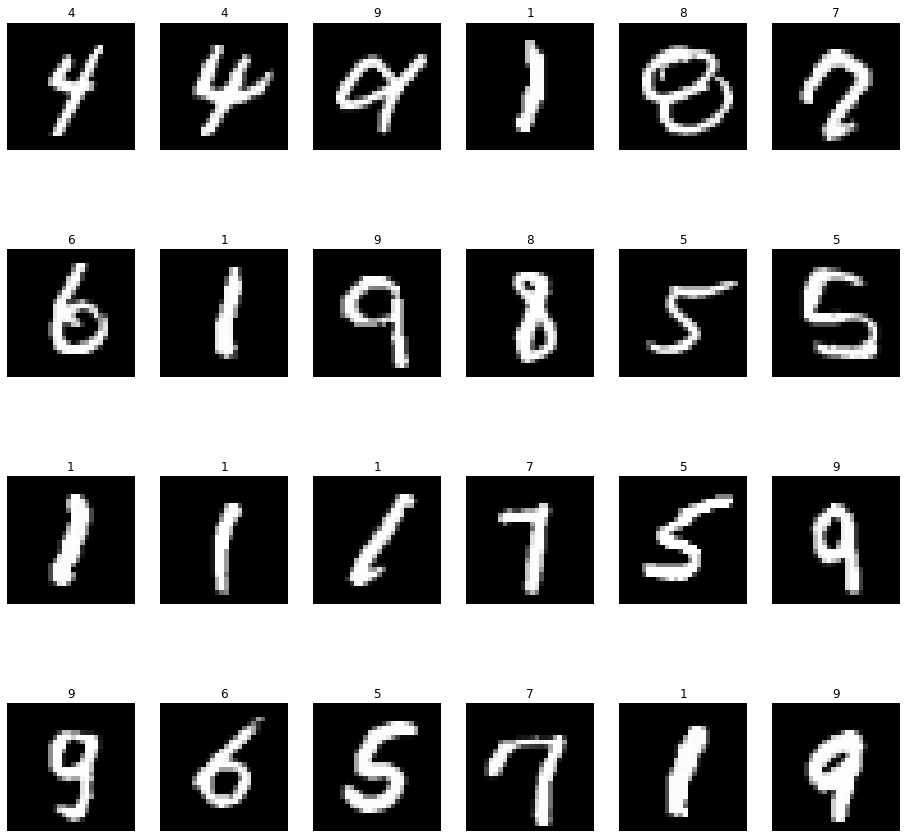

In [3]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
grid_size = (4,6)

plt.figure(figsize=(16,16))

indexes = np.random.choice(range(len(X_train)), size=grid_size[0]*grid_size[1], replace=False)

for i in range(grid_size[0]*grid_size[1]):
    plt.subplot(grid_size[0],grid_size[1],i+1)
    
    # idx = randint(0,len(X_train))
    idx = indexes[i]
    img = X_train[idx]
    # img = np.array(char).reshape(IMAGE_ORIGINAL_SIZE) 

    import matplotlib.pyplot as plt
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(y_train[idx])
    plt.axis('off')
    
plt.show()

## Set data generator

In [6]:
def generator(batch_size=20, target_size=(128,128), classname='vowel_diacritic'):
    while 1:
        # select indexes
        idxs = [i for i in range(len(X_train))]
        np.random.shuffle(idxs)
        idxs = idxs[:batch_size]
        
        data = np.zeros((batch_size, target_size[0], target_size[1], 1))
        labels = np.zeros((batch_size, len(np.unique(y_train))))
        # read the image
        for i in range(len(idxs)):
            img = X_train[idxs[i]]
            img = img.reshape(img.shape + (1,))            
            data[i] = img / 255.
            
            labels[i,y_train[idxs[i]]] = 1
        
        yield data, labels

train_generator = generator(target_size=(28,28))
validation_generator = generator(target_size=(28,28))

## Model

### Architecture

In [7]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(len(np.unique(y_train)), activation='softmax'))
model.summary()

model.compile(optimizer=RMSprop(lr=1e-4), metrics=['acc'], loss='categorical_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total para

### Train the model

In [8]:
history = model.fit_generator(train_generator, 
                             steps_per_epoch=500,
                             epochs=40,
                             validation_data=validation_generator,
                              validation_steps=100)

Epoch 1/40
500/500 [==============================] - 5s 9ms/step - loss: 0.9658 - acc: 0.7493 - val_loss: 0.4012 - val_acc: 0.8795
Epoch 2/40
500/500 [==============================] - 3s 6ms/step - loss: 0.2999 - acc: 0.9135 - val_loss: 0.2406 - val_acc: 0.9270
Epoch 3/40
500/500 [==============================] - 3s 6ms/step - loss: 0.2131 - acc: 0.9380 - val_loss: 0.2058 - val_acc: 0.9405
Epoch 4/40
500/500 [==============================] - 3s 6ms/step - loss: 0.1685 - acc: 0.9489 - val_loss: 0.1589 - val_acc: 0.9480
Epoch 5/40
500/500 [==============================] - 4s 7ms/step - loss: 0.1335 - acc: 0.9588 - val_loss: 0.1460 - val_acc: 0.9550
Epoch 6/40
500/500 [==============================] - 3s 7ms/step - loss: 0.1327 - acc: 0.9606 - val_loss: 0.1471 - val_acc: 0.9590
Epoch 7/40
500/500 [==============================] - 3s 7ms/step - loss: 0.1305 - acc: 0.9618 - val_loss: 0.1028 - val_acc: 0.9665
Epoch 8/40
500/500 [==============================] - 4s 7ms/step - loss: 0.

### Save the model

In [10]:
model_path = os.path.join(MODELS_DIR, "basic_nn" + ".h5")
model.save(model_path)

### Load the model

In [ ]:
model_path = os.path.join(MODELS_DIR, "basic_nn" + ".h5")
model = load_model(model_path)

In [6]:
"""
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
return model
"""

IndentationError: unexpected indent (<ipython-input-6-759664c6b976>, line 2)

### Evaluation

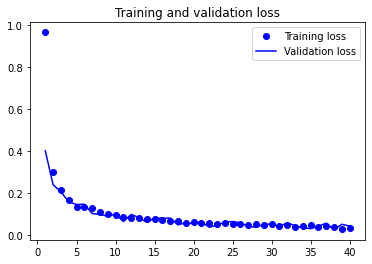

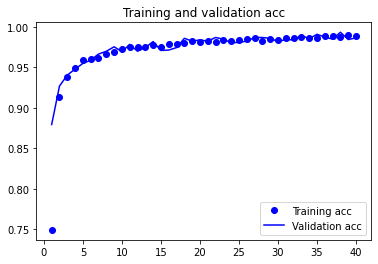

In [11]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

## Predictions

### On test data

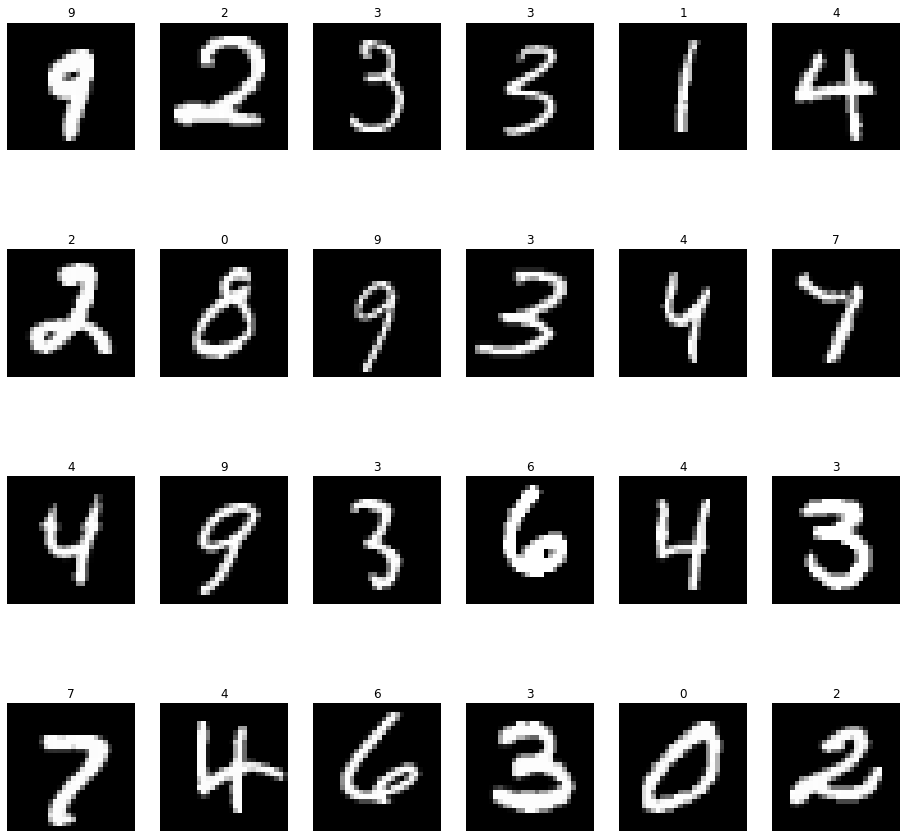

In [8]:
import random

def random_image():
    idx = random.randint(0,len(X_test)-1)
    img = X_test[idx]    
    return img

grid_size = (4,6)

plt.figure(figsize=(16,16))

indexes = np.random.choice(range(len(X_train)), size=grid_size[0]*grid_size[1], replace=False)

for i in range(grid_size[0]*grid_size[1]):
    plt.subplot(grid_size[0],grid_size[1],i+1)
        
    img = random_image()
    predicted_class = model.predict_classes(img.reshape((1,) + img.shape + (1,)))

    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(predicted_class[0])
    plt.axis('off')
    
plt.show()


### On real data

In [36]:
img_path = os.path.join("/media/laurent/backup/data/handwritting/images", "jules_2.png")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28,28), interpolation = cv2.INTER_NEAREST)

edges = cv2.Canny(img,28,28)
enhanced_img = cv2.equalizeHist(img)

binimg = img
binimg = cv2.bilateralFilter(binimg, 2, 90,16)
binimg = cv2.GaussianBlur(binimg,(5,5),0)
binimg = cv2.adaptiveThreshold(binimg, 1, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 55, -3)

gaussimg = img
cv2.bilateralFilter(gaussimg, 9, 90,16)
gaussimg = cv2.GaussianBlur(gaussimg,(5,5),0)

img = img / 255
edges = edges / 255
enhanced_img = enhanced_img / 255
gaussimg = gaussimg / 255


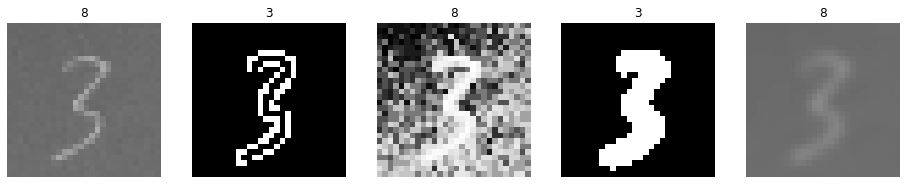

In [37]:
predicted_class = model.predict_classes(img.reshape((1,) + img.shape + (1,)))
edges_predicted_class = model.predict_classes(edges.reshape((1,) + edges.shape + (1,)))
enhanced_predicted_class = model.predict_classes(enhanced_img.reshape((1,) + enhanced_img.shape + (1,)))
bin_predicted_class = model.predict_classes(binimg.reshape((1,) + binimg.shape + (1,)))
gaussimg_predicted_class = model.predict_classes(gaussimg.reshape((1,) + gaussimg.shape + (1,)))

grid_size = (1,5)

plt.figure(figsize=(16,16))
plt.subplot(grid_size[0],grid_size[1],1)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.title(predicted_class[0])
plt.axis('off')
plt.subplot(grid_size[0],grid_size[1],2)
plt.imshow(edges, cmap='gray', vmin=0, vmax=1)
plt.title(edges_predicted_class[0])
plt.axis('off')
plt.subplot(grid_size[0],grid_size[1],3)
plt.imshow(enhanced_img, cmap='gray', vmin=0, vmax=1)
plt.title(enhanced_predicted_class[0])
plt.axis('off')
plt.subplot(grid_size[0],grid_size[1],4)
plt.imshow(binimg, cmap='gray', vmin=0, vmax=1)
plt.title(bin_predicted_class[0])
plt.axis('off')
plt.subplot(grid_size[0],grid_size[1],5)
plt.imshow(gaussimg, cmap='gray', vmin=0, vmax=1)
plt.title(gaussimg_predicted_class[0])
plt.axis('off')

plt.show()

## Mixing colors

(168.68, 59.2, 157.12)


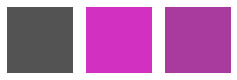

In [28]:
import matplotlib.pyplot as plt
grey = (83,83,83)
purple = (209, 48, 192)


grey_image = np.zeros((32,32,3)).astype('uint8')
grey_image[:,:,:] = grey
grey_image = np.dstack((grey_image, np.zeros((grey_image.shape[0],grey_image.shape[1]),dtype=np.uint8)+255))

purple_image = np.zeros((32,32,3)).astype('uint8')
purple_image[:,:,:] = purple
purple_image = np.dstack((purple_image, np.zeros((purple_image.shape[0],purple_image.shape[1]),dtype=np.uint8)+255))

alpha_grey = 120
alpha_purple = 255

melted_image = np.zeros((32,32,3)).astype('uint8')
melted = ((grey[0] * alpha_grey + purple[0] * alpha_purple) / (alpha_grey + alpha_purple),
          (grey[1] * alpha_grey + purple[1] * alpha_purple) / (alpha_grey + alpha_purple),
          (grey[2] * alpha_grey + purple[2] * alpha_purple) / (alpha_grey + alpha_purple))
print(melted)
melted_image[:,:,:] = melted

plt.figure(figsize=(4,16))
plt.subplot(1,3,1)
plt.imshow(grey_image)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(purple_image)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(melted_image)
plt.axis('off')
plt.show()

In [34]:
grey = np.array([83,83,83])
purple = np.array([209, 48, 192])

alpha_grey = 120
alpha_purple = 255

melted = ((grey * alpha_grey + purple * alpha_purple) / (alpha_grey + alpha_purple)).astype('uint8')
melted



array([168,  59, 157], dtype=uint8)

In [40]:
import numpy as np
test = np.zeros((32,32,3))
print(test.shape)
test[:,:,:] = (1,1,1)
print(test.shape)

(32, 32, 1)


ValueError: could not broadcast input array from shape (3) into shape (32,32,1)